In [1]:
# On classic MNIST
import tensorflow
from tensorflow import keras
from tensorflow.keras import layers,models
from tensorflow.keras.datasets import mnist
(X_train, y_train),(X_test,y_test) = mnist.load_data()

X_train_reshaped = X_train.reshape((60000,28,28,1))
X_test_reshaped = X_test.reshape((10000,28,28,1))

from tensorflow.keras.utils import to_categorical
y_train_reshaped = to_categorical(y_train)
y_test_reshaped = to_categorical(y_test)

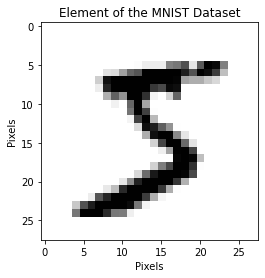

In [9]:
import matplotlib.pyplot as plt 

plt.imshow(X_train_reshaped[0].reshape((28,28)),cmap = plt.cm.binary)
plt.title('Element of the MNIST Dataset')

plt.xlabel('Pixels')
plt.ylabel('Pixels')
plt.show()

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28,28, 1),padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(10, activation='softmax'))

model.summary()
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

model.fit(X_train_reshaped,y_train_reshaped,epochs=30, batch_size=100)

In [ ]:
import sklearn
from sklearn.metrics import accuracy_score

pred = model.predict(X_test_reshaped)
print(type(pred[0]))
pred = (pred>0.5)
print(pred[0])
print(type(y_test_reshaped[0]))
print(accuracy_score(pred,y_test_reshaped))